In [1]:
import tensorflow as tf
import pandas as pd
import keras

Using TensorFlow backend.


In [2]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_df=pd.read_csv(r".\dataset\LoadFromDF\train-files-labels2.csv")

train_df.head()

,label,class_name
0,1,dog.1.jpg
1,1,dog.10.jpg
2,1,dog.11.jpg
3,1,dog.12.jpg
4,1,dog.13.jpg


In [4]:
test_df=pd.read_csv(r".\dataset\LoadFromDF\test-files-labels2.csv")

test_df.head()

,label,class_name
0,1,dog.4001.jpg
1,1,dog.4002.jpg
2,1,dog.4003.jpg
3,1,dog.4004.jpg
4,1,dog.4005.jpg


In [5]:
datagen=ImageDataGenerator(rescale=1./255)
train_generator=datagen.flow_from_dataframe(dataframe=train_df, directory=r".\dataset\LoadFromDF\train", x_col="class_name", y_col="label", class_mode="other", target_size=(96,96), batch_size=32)

valid_generator=datagen.flow_from_dataframe(dataframe=test_df, directory=r".\dataset\LoadFromDF\test", x_col="class_name", y_col="label", class_mode="other", target_size=(96,96), batch_size=32)


Found 98 validated image filenames.
Found 38 validated image filenames.


In [6]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(96,96,3),activation = 'relu'))

model.add(Conv2D(32, (3, 3),activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation = 'relu'))

model.add(Conv2D(64, (3, 3),activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
 

model.add(Dense(1, activation='sigmoid'))



In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)            

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=["accuracy"])

In [9]:
model.fit_generator(generator=train_generator,
                    steps_per_epoch=10,
                    validation_data=valid_generator,
                    validation_steps=10,
                    epochs=1)

Epoch 1/1
10/10 [==============================] - 12s 1s/step - loss: 0.9282 - acc: 0.5554 - val_loss: 0.6900 - val_acc: 0.6053


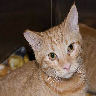

In [21]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img(r'C:\Users\Administrator\Desktop\2-keras-cnn-catdog\dataset\single_prediction\cat.jpg',
                           target_size =(96,96))
                           
test_image

In [22]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [23]:
## For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)

In [24]:
result = model.predict(test_image)

In [25]:
result

array([[0.00065058]], dtype=float32)

In [26]:
## Class label of dog and cat

if result == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

In [27]:
prediction

'cat'